### Plotting PTMs in Comet and PEAKS results using python for *Prochlococcus* MED4 benchmark study

Starting with:

    Peaks de novo results (.csv) of PTM-optimized sequencing
    Comet results from PTM-optimized database searches

Goal:

    Figures comparing the modifcation type and extent in database and de novo peptides
    
Using:

    - pandas
    - matplotlib

In [1]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import pyplot
import seaborn as sns
from scipy.stats import kde
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

In [53]:
# read in csvs made in MED4-PeaksDB and MED4-Comet notebooks
# bringing in Comet > XCorr 3 and de novo peptides > 50% ALC

peaks = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/PeaksDN/RAL95_MED2_trypsin_combine_PTMopt_DN50_totals.csv")
comet = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/pro2020/RAL4_95_MED2_trypsin/TPP/RAL95_MED2_trypsin_combine_Comet3_totals.csv")

frames = [peaks, comet]
index = ['peaks50', 'comet3']

# concatenate dataframes
ptm = pd.concat(frames, sort=False, ignore_index=True)

# there's a useless column in there
ptm = ptm.loc[:, ~ptm.columns.str.contains('^Unnamed')]

# reindex with peaks and comet
names = ['peaks50', 'comet3']
ptm.insert(loc=0, column='data source', value=names)
ptm.set_index('data source')


ptm.head()

,data source,A,C,D,E,F,G,H,I,K,...,k-iron,k-meth,r-meth,% C w/ carb.,% M w/ oxid,% N w/ deam,% Q w/ deam,% K w/ iron,% K w/ meth,% R w/ meth
0,peaks50,26298,4530,16675,28228,13678,18885,6541,0,37569,...,3157,3887,6077,1.000000,0.437152,0.181737,0.032968,0.084032,0.103463,0.303774
1,comet3,34766,3876,29841,37360,16417,34864,6466,38307,42186,...,472,247,108,0.928535,0.293919,0.072883,0.074650,0.011189,0.005855,0.005027


[Text(0, 0, 'Peaks 50 % ALC'), Text(0, 0, 'Comet > XCorr 3')]

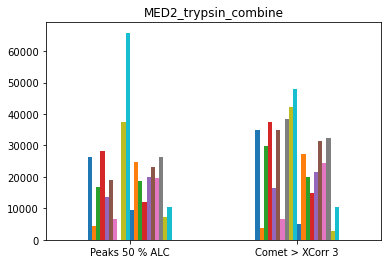

In [54]:
# bar plot of residue totals
# there is no isoleucine (I) in Peaks data, which is why L is really big and I is 0


x_labels = ['Peaks 50 % ALC', 'Comet > XCorr 3']

ax = ptm.plot(y=['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'], kind="bar", title = 'MED2_trypsin_combine')
plt.xticks(rotation=0)
ax.get_legend().remove()
ax.set_xticklabels(x_labels)

[Text(0, 0, 'Peaks 50 % ALC'), Text(0, 0, 'Comet > XCorr 3')]

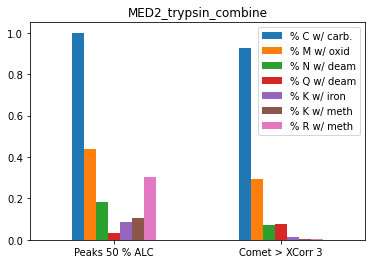

In [55]:
# bar plot of relative modifications

x_labels = ['Peaks 50 % ALC', 'Comet > XCorr 3']

ax = ptm.plot(y=['% C w/ carb.', '% M w/ oxid', '% N w/ deam', '% Q w/ deam', '% K w/ iron', '% K w/ meth', '% R w/ meth'], kind="bar", title = 'MED2_trypsin_combine')
plt.xticks(rotation=0)
#ax.get_legend().remove()
ax.set_xticklabels(x_labels)